In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Leggiamo il dataset
df = pd.read_csv("haspeede2_dev.tsv")

In [ ]:
# Visualizziamo le prime 5 righe
df.head()

,id,full_text,hs,stereotype
0,2066,"È terrorismo anche questo, per mettere in uno ...",0,0
1,2045,@user @user infatti finché ci hanno guadagnato...,0,0
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",0,0
3,1259,"@user ad uno ad uno, perché quando i migranti ...",0,0
4,949,Il divertimento del giorno? Trovare i patrioti...,0,0


# Esploriamo il dataset

In [ ]:
print("Il dataset contiene",  len(df), "tweet.")

Il dataset contiene 6839 tweet.


Il dataset è stato annotato con due etichette: **hate speech** (hs) e **stereotype**.


Per esempio, consideriamo un tweet singolo:

In [ ]:
n = 1200 # Numero di riga
print(df.loc[n])

id                                                          882
full_text     @user a Roma per fine mese sarà pronto il prog...
hs                                                            0
stereotype                                                    1
Name: 1200, dtype: object


Ogni tweet è identificato da un numero univoco, che chiamiamo id (identifier)

In [ ]:
print("Il testo del tweet è: \n", df.loc[n]["full_text"])

Il testo del tweet è: 
 @user a Roma per fine mese sarà pronto il progetto della giunta #Raggi per dare le case a tutti i rom. Questo è #M5s 


In [ ]:
print("La label per la presenza di Hate Speech è", df.loc[n]["hs"])
print("La label per la presenza di stereotipi è", df.loc[n]["stereotype"])

La label per la presenza di Hate Speech è 0
La label per la presenza di stereotipi è 1


### Quanti tweet contengono stereotipi?

In [ ]:
df["stereotype"].value_counts()

0    3797
1    3042
Name: stereotype, dtype: int64

### Quanti tweet contengono linguaggio d'odio?

In [ ]:
df["hs"].value_counts()

0    4073
1    2766
Name: hs, dtype: int64

## Quali parole sono più comuni nel dataset?

Mettiamo insieme tutti i tweet in un unico testo (costruiamo una unica stringa (testo) che in cui i vari tweet sono separati da spazi)


In [ ]:
testo_completo = " ".join(df["full_text"]) # simbolo.join(lista) -> crea una stringa che contiene gli elementi della lista separata da un simbolo
testo_completo

'È terrorismo anche questo, per mettere in uno stato di soggezione le persone e renderle innocue, mentre qualcuno... URL  @user @user infatti finché ci hanno guadagnato con i campi #rom tutto era ok con #Alemanno #Ipocriti  Corriere: Tangenti, Mafia Capitale dimenticataMazzette su buche e campi rom URL #roma  @user ad uno ad uno, perché quando i migranti israeliti arrivarono in terra di Canaan fecero fuori tutti i Canaaniti.  Il divertimento del giorno? Trovare i patrioti italiani che inneggiano contro i rom facendo la spesa alla #Lidl (multinazionale tedesca).  Modena: Comune paga la benzina ai nomadi che portano figli a scuola: MODENA – La giunta PD… URL  @user @user altro che islam o cristianesimo!!! ...a c dobbiamo sorbire anche "dell\'ignorante" : islam è  uno solo!!  @user @user @user grazie stef stavo giusto caricando ho anche messo Che Salvini avallava il finanziare campi rom  ... e smettetela di dire che anche gli italiani sono stati migranti, erano trattati male ma non per qu

Dividiamo questo testo in parole (dette token). Per questo, tilizziamo la libreria nltk.

Basta dividere le parole utilizzando gli spazi?


In [ ]:
parole = nltk.word_tokenize(testo_completo)

In [ ]:
parole

['È',
 'terrorismo',
 'anche',
 'questo',
 ',',
 'per',
 'mettere',
 'in',
 'uno',
 'stato',
 'di',
 'soggezione',
 'le',
 'persone',
 'e',
 'renderle',
 'innocue',
 ',',
 'mentre',
 'qualcuno',
 '...',
 'URL',
 '@',
 'user',
 '@',
 'user',
 'infatti',
 'finché',
 'ci',
 'hanno',
 'guadagnato',
 'con',
 'i',
 'campi',
 '#',
 'rom',
 'tutto',
 'era',
 'ok',
 'con',
 '#',
 'Alemanno',
 '#',
 'Ipocriti',
 'Corriere',
 ':',
 'Tangenti',
 ',',
 'Mafia',
 'Capitale',
 'dimenticataMazzette',
 'su',
 'buche',
 'e',
 'campi',
 'rom',
 'URL',
 '#',
 'roma',
 '@',
 'user',
 'ad',
 'uno',
 'ad',
 'uno',
 ',',
 'perché',
 'quando',
 'i',
 'migranti',
 'israeliti',
 'arrivarono',
 'in',
 'terra',
 'di',
 'Canaan',
 'fecero',
 'fuori',
 'tutti',
 'i',
 'Canaaniti',
 '.',
 'Il',
 'divertimento',
 'del',
 'giorno',
 '?',
 'Trovare',
 'i',
 'patrioti',
 'italiani',
 'che',
 'inneggiano',
 'contro',
 'i',
 'rom',
 'facendo',
 'la',
 'spesa',
 'alla',
 '#',
 'Lidl',
 '(',
 'multinazionale',
 'tedesca',
 '

Trasformiamo tutti i token in minuscolo ed eliminiamo i numeri e la punteggiatura.

In [ ]:
# Trasformiamo tutto in minuscolo
parole =[p.lower() for p in parole]

# Eliminiamo tutti i token che non contengono caratteri alfabetici
# Per esempio, i segni di interpunzione
parole =[p for p in parole if p.isalpha()]

Vogliamo vedere quali sono le parole più comuni nel nostro dataset.

Utilizziamo un counter (uno strumento della libreria di Python).

**ESERCIZIO:** Potremmo fare la stessa cosa senza utilizzare nessuna libreria?


In [ ]:
count = Counter(parole)
print(count)

Counter({'user': 4712, 'e': 4374, 'di': 4117, 'url': 3516, 'che': 3012, 'i': 2959, 'a': 2825, 'in': 2309, 'il': 2307, 'la': 2282, 'non': 2131, 'per': 1924, 'è': 1645, 'rom': 1558, 'un': 1341, 'migranti': 1293, 'gli': 1228, 'sono': 1226, 'le': 1060, 'con': 1017, 'da': 998, 'immigrati': 980, 'tutti': 966, 'si': 957, 'ma': 880, 'della': 846, 'dei': 740, 'italia': 726, 'una': 711, 'loro': 663, 'del': 658, 'se': 650, 'anche': 648, 'roma': 617, 'ci': 614, 'al': 611, 'italiani': 599, 'ha': 553, 'come': 542, 'alla': 541, 'hanno': 467, 'lo': 457, 'stranieri': 454, 'l': 422, 'ai': 417, 'più': 416, 'solo': 415, 'chi': 383, 'li': 380, 'casa': 363, 'o': 361, 'via': 359, 'noi': 346, 'nel': 345, 'campo': 333, 'clandestini': 313, 'salvini': 308, 'perché': 307, 'fare': 307, 'questo': 305, 'terroristi': 305, 'profughi': 302, 'questi': 302, 'tutto': 300, 'nomadi': 287, 'no': 276, 'immigrazione': 274, 'degli': 264, 'islamici': 248, 'contro': 240, 'mi': 238, 'musulmani': 237, 'dopo': 232, 'agli': 227, 'sen

In [ ]:
most_occur = count.most_common(10)  # Visualizziamo le 10 parole più frequenti
most_occur

[('user', 4712),
 ('e', 4374),
 ('di', 4117),
 ('url', 3516),
 ('che', 3012),
 ('i', 2959),
 ('a', 2825),
 ('in', 2309),
 ('il', 2307),
 ('la', 2282)]

Vogliamo visualizzare queste parole con una WordCloud (una "nuvola di parole").

Una Word Cloud contiene le parole più comuni di un testo, con una grandezza proporzionale alla loro frequenza.

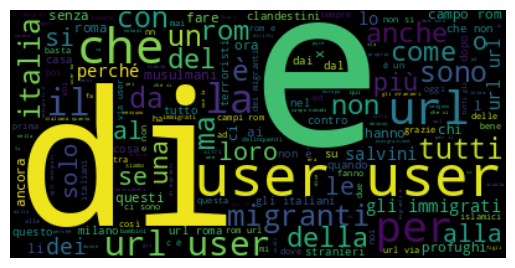

In [ ]:
wordcloud = WordCloud().generate(" ".join(parole))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Notiamo che sono parole molto comuni, per esempio proposizioni e articoli...

Queste parole sono molto comuni, ma non ci danno molte informazioni sul contenuto dei tweet. Sono spesso chiamate **"stop words"**.

Alcune librerie contengono già delle liste di stop words in varie lingue, per permetterci di eliminarle facilmente.

In [ ]:
it_stopwords = stopwords.words("italian") + ["user", "url"] # Aggiungiamo alle stopwords le parole user e url, che indicano un tag e un url

In [ ]:
it_stopwords

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [ ]:
# Eliminiamo le stopwrds
filtered_words = [] # Questa lista conterrà le parole filtrate
for w in parole:  # Per tutte le parola nei nostri tweet...
    if w not in it_stopwords: # se non sono stopwprds
        filtered_words.append(w) # li aggiungiamo a una lista di parole filtrate

In [ ]:
filtered_words

['terrorismo',
 'mettere',
 'stato',
 'soggezione',
 'persone',
 'renderle',
 'innocue',
 'mentre',
 'qualcuno',
 'infatti',
 'finché',
 'guadagnato',
 'campi',
 'rom',
 'ok',
 'alemanno',
 'ipocriti',
 'corriere',
 'tangenti',
 'mafia',
 'capitale',
 'dimenticatamazzette',
 'buche',
 'campi',
 'rom',
 'roma',
 'quando',
 'migranti',
 'israeliti',
 'arrivarono',
 'terra',
 'canaan',
 'fuori',
 'canaaniti',
 'divertimento',
 'giorno',
 'trovare',
 'patrioti',
 'italiani',
 'inneggiano',
 'rom',
 'spesa',
 'lidl',
 'multinazionale',
 'tedesca',
 'modena',
 'comune',
 'paga',
 'benzina',
 'nomadi',
 'portano',
 'figli',
 'scuola',
 'modena',
 'giunta',
 'altro',
 'islam',
 'cristianesimo',
 'dobbiamo',
 'sorbire',
 'islam',
 'solo',
 'grazie',
 'stef',
 'giusto',
 'caricando',
 'messo',
 'salvini',
 'avallava',
 'finanziare',
 'campi',
 'rom',
 'smettetela',
 'dire',
 'italiani',
 'stati',
 'migranti',
 'trattati',
 'male',
 'uccidevano',
 'innocenti',
 'strada',
 'minorenne',
 'rom',
 'a

In [ ]:
# Riconteggiamo le parole più comuni dopo averle filtrate
count = Counter(filtered_words)
most_occur = count.most_common(10)
most_occur

[('rom', 1558),
 ('migranti', 1293),
 ('immigrati', 980),
 ('italia', 726),
 ('roma', 617),
 ('italiani', 599),
 ('stranieri', 454),
 ('solo', 415),
 ('casa', 363),
 ('via', 359)]

Per visualizzarli meglio, possiamo utilizzare una word cloud.
Una world cloud è  visualizza le parole più comuni, in una grandezza che è proporzionale alla loro frequenza (più grandi == più frequenti)

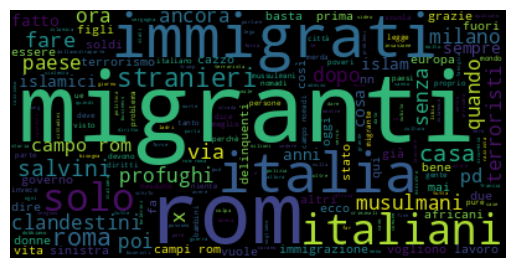

In [ ]:
wordcloud = WordCloud().generate(" ".join(filtered_words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Trovate altri esempi di word cloud [qui](https://amueller.github.io/word_cloud/auto_examples/index.html)